<a href="https://colab.research.google.com/github/fayrouz-mikhael/DataScience-Project/blob/master/project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from google.colab import files
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
import xgboost as xgb
%matplotlib inline

In [0]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
submit2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)
schools_df = pd.read_csv('https://data.cityofnewyork.us/resource/23z9-6uk9.csv', usecols = ['postcode'])
total_df = pd.merge(train_df,schools_df,left_on="addr_zip", right_on="postcode")
cf = submit2_df #retaining the dataframe in cf instead incase I want to look at the original without edits
cf.min_to_subway = cf.min_to_subway.fillna(cf.min_to_subway.mean(), axis=0) #Replacing empty values with the mean of the entire column
cf.year_built = cf.year_built.fillna(cf.year_built.median(), axis=0) #Replacing empty values with the median of the entire column

In [107]:
print(total_df)

      addr_unit  building_id  bedrooms  ...  floornumber  line postcode
0          #22A       551248         4  ...          NaN   NaN    11226
1          #22A       551248         4  ...          NaN   NaN    11226
2          #22A       551248         4  ...          NaN   NaN    11226
3          #22A       551248         4  ...          NaN   NaN    11226
4          #22A       551248         4  ...          NaN   NaN    11226
...         ...          ...       ...  ...          ...   ...      ...
39441       #30      1083148         1  ...          NaN   NaN    10460
39442       #30      1083148         1  ...          NaN   NaN    10460
39443       #30      1083148         1  ...          NaN   NaN    10460
39444       #30      1083148         1  ...          NaN   NaN    10460
39445        #2      1917055         0  ...          2.0   NaN    11423

[39446 rows x 39 columns]


In [109]:
total_df.sample(5).transpose()

,31607,4721,4949,39017,12129
addr_unit,#3,#212,#4A,#10L,#3A
building_id,65353,352138,375010,190,303442
bedrooms,2,1,1,2,3
bathrooms,2,1,1,2,1
size_sqft,1150,757,850,1200,950
created_at,2018-05-16 16:20:33,2018-07-12 16:19:22,2018-06-20 18:04:50,2018-05-15 14:17:18,2018-07-24 16:29:47
addr_street,489 WEST END AVENUE,55 HOPE STREET,105 AINSLIE STREET,211 NORTH END AVENUE,224 VERNON AVENUE
addr_city,New York,Brooklyn,Brooklyn,New York,Brooklyn
addr_zip,10024,11211,11211,10282,11206
addr_lat,40.7873,40.7134,40.7127,40.7163,40.6952


Build training data

In [0]:
feature_cols = [
     'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman'          
]
#train_features = train_df[feature_cols] 
train_features = total_df[feature_cols] 

# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
#train_target = train_df['rent']
train_target = total_df['rent']

Fit model

In [113]:
lreg = LinearRegression()
lreg.fit(train_features, train_target)

rf = RandomForestRegressor()
rf.fit(train_features, train_target)

DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(train_features, train_target);

gbr = GradientBoostingRegressor()
gbr.fit(train_features, train_target)

xgbr = xgb.XGBRegressor()
xgbr.fit(train_features, train_target)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:52:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Predict and Measure Using Test 1

In [114]:
test_features = test_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(train_features.median(), axis=0)

# construct predictions 
test_df['predicted'] = lreg.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

3863757.823941606

Combine Data, Predict Values for Test 3

In [116]:
#master_df = train_df.append(test_df, sort=False)
master_df = total_df.append(test_df, sort=False)
master_features = master_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
master_target = master_df['rent']

rf.fit(master_features, master_target)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [117]:
#train_df.corr() #Looking at which features correlate the most with the rent from the training data
total_df.corr()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,year_built,min_to_subway,has_doorman,has_elevator,has_fireplace,has_dishwasher,is_furnished,has_gym,allows_pets,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber,postcode
building_id,1.000000,0.010930,0.017084,0.013395,0.048920,0.010168,0.085967,0.098050,0.075774,-0.119933,0.033183,-0.006374,-0.022167,0.038956,-0.011441,0.020230,0.023119,0.038790,0.035513,0.016065,0.035893,0.009093,-0.016212,0.021210,0.127075,0.049043,0.010203,0.029178,0.013046,0.048920
bedrooms,0.010930,1.000000,0.498490,0.535417,0.170062,-0.128916,0.138303,0.116075,0.134907,-0.249380,-0.073653,0.015433,-0.261560,-0.308283,0.063400,0.053635,-0.058200,-0.232153,0.009528,0.108166,-0.152136,-0.106651,-0.234989,-0.092196,0.017733,-0.133208,0.367878,-0.007518,-0.168857,0.170062
bathrooms,0.017084,0.498490,1.000000,0.612982,-0.052138,0.021418,-0.055573,-0.058466,-0.062111,0.071073,0.005172,0.022334,0.082031,0.067875,0.133366,0.148832,0.042909,0.083302,0.059597,0.303542,0.043797,0.082362,0.082121,0.103386,0.099623,0.079118,0.641630,-0.018607,0.111146,-0.052138
size_sqft,0.013395,0.535417,0.612982,1.000000,0.006671,-0.034516,-0.023569,-0.008442,-0.003441,-0.003130,-0.012511,0.009244,0.032061,0.013696,0.185160,0.111492,0.033830,-0.002281,0.011733,0.270349,-0.014756,0.015297,0.017149,0.057629,0.140713,0.030144,0.677478,-0.079694,0.041935,0.006671
addr_zip,0.048920,0.170062,-0.052138,0.006671,1.000000,-0.617437,0.468900,0.953529,0.958323,-0.326268,0.008165,0.024631,-0.269900,-0.239112,-0.056894,-0.069995,-0.154548,-0.119935,0.016201,-0.030151,-0.037711,0.031696,-0.224261,-0.201289,-0.005958,-0.084019,-0.269888,0.108152,-0.280970,1.000000
addr_lat,0.010168,-0.128916,0.021418,-0.034516,-0.617437,1.000000,0.110360,-0.500414,-0.497908,0.197797,-0.002226,-0.028638,0.182053,0.169528,0.010139,0.052309,0.085278,0.094368,-0.023349,0.005359,0.061018,-0.009101,0.151513,0.156829,-0.000075,0.057914,0.104790,-0.034295,0.184396,-0.617437
addr_lon,0.085967,0.138303,-0.055573,-0.023569,0.468900,0.110360,1.000000,0.520818,0.543177,-0.268892,-0.021217,-0.011840,-0.253841,-0.174014,-0.086996,-0.117225,-0.093636,-0.160180,-0.114881,-0.145298,-0.041344,-0.102039,-0.243462,-0.081584,-0.066322,-0.122363,-0.271706,0.047506,-0.221412,0.468900
bin,0.098050,0.116075,-0.058466,-0.008442,0.953529,-0.500414,0.520818,1.000000,0.990910,-0.276264,0.031995,0.023390,-0.204152,-0.169300,-0.068863,-0.068522,-0.148047,-0.054475,0.007236,-0.010946,0.018843,0.065150,-0.162669,-0.163568,0.008960,-0.029362,-0.271766,0.095255,-0.233399,0.953529
bbl,0.075774,0.134907,-0.062111,-0.003441,0.958323,-0.497908,0.543177,0.990910,1.000000,-0.313073,0.020889,0.018644,-0.245901,-0.208816,-0.062720,-0.075377,-0.150329,-0.101142,-0.015047,-0.029405,-0.012335,0.031042,-0.205474,-0.181063,-0.017316,-0.078114,-0.281518,0.073987,-0.265798,0.958323
floor_count,-0.119933,-0.249380,0.071073,-0.003130,-0.326268,0.197797,-0.268892,-0.276264,-0.313073,1.000000,0.170182,-0.012876,0.637752,0.551845,-0.040283,0.165284,0.149324,0.577128,0.185739,0.133286,0.414288,0.340919,0.647736,0.502719,0.108913,0.434647,0.199884,0.144247,0.765669,-0.326268


Create Submission File for test2

In [118]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = rf.predict(submit2_features) 
submit2_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], test_df['rent'])

13257988.499244625

In [119]:
test=submit2_df.sort_values(['predictions'],ascending=[1])
print(test)

          addr_unit  building_id  bedrooms  ...  line  predictions fake_rent
rental_id                                   ...                             
7495531         #1J      2190883         1  ...     J       1300.0    3000.0
7448083         #4C      1279153         0  ...     C       1353.6    3000.0
7507633         #1B       248326         0  ...     B       1363.5    3000.0
7438504        #1RR     18714016         0  ...    RR       1395.0    3000.0
7450363         #2B        60550         1  ...     B       1420.0    3000.0
...             ...          ...       ...  ...   ...          ...       ...
7480519     #13/14C        64603         5  ...  /14C      24575.0    3000.0
7481848       #PH2C          313         4  ...    2C      30149.5    3000.0
7470277     #19WEST         2464         4  ...   NaN      31870.0    3000.0
7500250         #7D        32875         5  ...     D      35450.0    3000.0
7492594         #3D         5260         4  ...     D      38830.0    3000.0

In [120]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = xgbr.predict(submit2_features) 
submit2_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], test_df['rent'])

12765238.561066391

In [121]:
test=submit2_df.sort_values(['predictions'],ascending=[1])
print(test)

          addr_unit  building_id  bedrooms  ...  line   predictions fake_rent
rental_id                                   ...                              
7441030         #4B       289630         0  ...     B   1501.637451    3000.0
7472128        #712      1606783         0  ...   NaN   1528.611816    3000.0
7471120          #1      1478710         0  ...   NaN   1577.074829    3000.0
7431037        #1EE      1481287         0  ...    EE   1665.452759    3000.0
7481896        #634      1677385         0  ...    34   1680.653320    3000.0
...             ...          ...       ...  ...   ...           ...       ...
7480519     #13/14C        64603         5  ...  /14C  23021.867188    3000.0
7470277     #19WEST         2464         4  ...   NaN  30274.652344    3000.0
7481848       #PH2C          313         4  ...    2C  34100.714844    3000.0
7492594         #3D         5260         4  ...     D  39251.187500    3000.0
7500250         #7D        32875         5  ...     D  40948.042

In [122]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = gbr.predict(submit2_features) 
submit2_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], test_df['rent'])

12934310.620612552

In [123]:
test=submit2_df.sort_values(['predictions'],ascending=[1])
print(test)

          addr_unit  building_id  bedrooms  ...  line   predictions fake_rent
rental_id                                   ...                              
7441030         #4B       289630         0  ...     B   1442.445594    3000.0
7472128        #712      1606783         0  ...   NaN   1490.111528    3000.0
7471120          #1      1478710         0  ...   NaN   1508.882442    3000.0
7461496          #1       820096         0  ...   NaN   1609.758515    3000.0
7492579         #4F     18356584         0  ...     F   1609.758515    3000.0
...             ...          ...       ...  ...   ...           ...       ...
7480519     #13/14C        64603         5  ...  /14C  23702.832478    3000.0
7481848       #PH2C          313         4  ...    2C  34306.817615    3000.0
7470277     #19WEST         2464         4  ...   NaN  34527.776788    3000.0
7492594         #3D         5260         4  ...     D  37099.322929    3000.0
7500250         #7D        32875         5  ...     D  42812.815

In [124]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = lreg.predict(submit2_features) 
submit2_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], test_df['rent'])

11514807.315416753

In [125]:
test=submit2_df.sort_values(['predictions'],ascending=[1])
print(test)

          addr_unit  building_id  bedrooms  ...  line   predictions fake_rent
rental_id                                   ...                              
7471120          #1      1478710         0  ...   NaN   -930.251824    3000.0
7481980         NaN       264169         0  ...   NaN    -75.224922    3000.0
7460293         #2F        66133         0  ...     F    543.774952    3000.0
7462042         #2R        59365         0  ...     R    543.806145    3000.0
7469539         #3B        51388         1  ...     B    554.300158    3000.0
...             ...          ...       ...  ...   ...           ...       ...
7480519     #13/14C        64603         5  ...  /14C  15186.830542    3000.0
7492594         #3D         5260         4  ...     D  16006.590663    3000.0
7500250         #7D        32875         5  ...     D  18744.442375    3000.0
7481848       #PH2C          313         4  ...    2C  20498.515869    3000.0
7513006        #542       119011         1  ...    42  25685.171

In [126]:
submit2_features = submit2_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit2_df['predictions'] = DTR.predict(submit2_features) 
submit2_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit2_df['fake_rent'] = np.ones(submit2_df['predictions'].shape) * master_target.median()
mean_squared_error(submit2_df['predictions'], test_df['rent'])

15276155.11623928

In [127]:
test=submit2_df.sort_values(['predictions'],ascending=[1])
print(test)

          addr_unit  building_id  bedrooms  ...  line  predictions fake_rent
rental_id                                   ...                             
7500499         #1F       367906         0  ...     F       1250.0    3000.0
7445584         #2B       956329         1  ...     B       1250.0    3000.0
7431121         #2K      1355704         0  ...     K       1250.0    3000.0
7448752        #3CC       261526         1  ...    CC       1250.0    3000.0
7429642         #5O      1354282         0  ...     O       1250.0    3000.0
...             ...          ...       ...  ...   ...          ...       ...
7505170      #3435B        69940         3  ...   35B      30000.0    3000.0
7506727         #8C        82996         4  ...     C      30000.0    3000.0
7500250         #7D        32875         5  ...     D      35000.0    3000.0
7492594         #3D         5260         4  ...     D      49500.0    3000.0
7470277     #19WEST         2464         4  ...   NaN      49500.0    3000.0

In [0]:
#files.download("sample_submission1.csv")

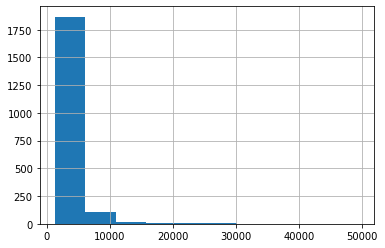

In [128]:
test['predictions'].hist() #Confirming largest predicted rent is 15516 visually. As expected we see that there are more apartments ranging from 2k-3k than any other price range.

In [129]:
submit2_df.isna().sum()

addr_unit                   22
building_id                  0
bedrooms                     0
bathrooms                    0
size_sqft                    0
created_at                   0
addr_street                  0
addr_city                    0
addr_zip                     0
addr_lat                     0
addr_lon                     0
bin                          2
bbl                          0
floor_count                  0
year_built                   0
min_to_subway                0
has_doorman                  0
has_elevator                 0
has_fireplace                0
has_dishwasher               0
is_furnished                 0
has_gym                      0
allows_pets                  0
has_washer_dryer             0
has_garage                   0
has_roofdeck                 0
has_concierge                0
has_pool                     0
has_garden                   0
has_childrens_playroom       0
rent                      2000
no_fee                       0
descript